## Automating Crypto Website Using its API

In [7]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os
from time import time
from time import sleep
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
url = 'http://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

parameters = {
    'start' : '1',
    'limit' : '15',
    'convert' : 'USD'
}

headers = {
    'Accepts' : 'applications/json',
    'X-CMC_PRO_API_KEY': 'USE-YOUR-API-KEY'
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url,params= parameters)
    data = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

In [8]:
data

{'status': {'timestamp': '2024-10-08T08:07:11.595Z',
  'error_code': 1001,
  'error_message': 'This API Key is invalid.',
  'elapsed': 0,
  'credit_count': 0}}

In [20]:
import pandas as pd
#This allows you to see all the columns , not just like 15
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [ ]:
# now normalize the data and make it all pretty in a dataframe
df = pd.json_normalize(data["data"])
df["timestamp"] = pd.to_datetime('now')
df

In [30]:
def api_runner():
    global df
    url = 'http://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

    parameters = {
        'start' : '1',
        'limit' : '15',
        'convert' : 'USD'
    }

    headers = {
        'Accepts' : 'applications/json',
        'X-CMC_PRO_API_KEY': 'db31d00d-5d0c-4d7e-800d-89fc16f02420'
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url,params= parameters)
        data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    df = pd.json_normalize(data["data"])
    df["timestamp"] = pd.to_datetime("now")
    df

    if not os.path.isfile(r'/Users/saqib/Downloads/API.csv'):
        df.to_csv(r'/Users/saqib/Downloads/API.csv', header="column_names")
    else:
        df.to_csv(r'/Users/saqib/Downloads/API.csv', mode= 'a', header=False)

In [13]:
for i in range(2):
    api_runner()
    print("API Runner Completed Successfully")
    sleep(60) # sleep for 1 minute
exit()

API Runner Completed Successfully
API Runner Completed Successfully


In [32]:
dfcheck = pd.read_csv(r'/Users/saqib/Downloads/API.csv')
dfcheck.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11770,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00,19764712.00,19764712.00,False,NaN,1,NaN,NaN,NaN,2024-10-08T07:45:00.000Z,62268.44,33461293676.98,65.59,-0.23,-1.87,-2.83,14.33,2.27,5.57,1230717740110.67,56.88,1307637194122.75,NaN,2024-10-08T07:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-08 07:47:18.249021
1,1,1027,Ethereum,ETH,ethereum,9387,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120379521.19,120379521.19,True,NaN,2,NaN,NaN,NaN,2024-10-08T07:45:00.000Z,2428.33,16442231357.16,44.07,-0.13,-2.06,-8.29,5.72,-9.20,-21.60,292320618655.73,13.51,292320618655.73,NaN,2024-10-08T07:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-08 07:47:18.249021
2,2,825,Tether USDt,USDT,tether,99768,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,119857245003.33,121372645784.90,True,NaN,3,NaN,NaN,NaN,2024-10-08T07:45:00.000Z,1.00,60433560498.28,47.41,0.01,-0.03,-0.01,-0.01,-0.05,-0.15,119830780250.50,5.54,121345846428.12,NaN,2024-10-08T07:45:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-08 07:47:18.249021
3,3,1839,BNB,BNB,bnb,2255,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145932306.78,145932306.78,False,NaN,4,NaN,NaN,NaN,2024-10-08T07:45:00.000Z,562.91,1678472669.20,10.90,-0.30,-2.24,-3.28,11.77,10.34,7.67,82147443799.14,3.80,82147443799.14,NaN,2024-10-08T07:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-08 07:47:18.249021
4,4,5426,Solana,SOL,solana,751,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,469263897.58,586127648.48,True,NaN,5,NaN,NaN,NaN,2024-10-08T07:45:00.000Z,143.03,2414949559.52,37.01,-0.66,-3.42,-8.72,10.19,-9.46,-0.57,67120747906.53,3.10,83836251493.07,NaN,2024-10-08T07:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-08 07:47:18.249021


In [44]:
pd.set_option('diplay.float_format', lambda x:'%.5f' % x)
df

pd.set_option("display.float_format", "{:.5f}".format)
dfcheck.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11770,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19764712.00000,19764712.00000,False,NaN,1,NaN,NaN,NaN,2024-10-08T07:45:00.000Z,62268.43782,33461293676.97929,65.58850,-0.23328,-1.86616,-2.83282,14.32690,2.27151,5.57040,1230717740110.67432,56.87990,1307637194122.75000,NaN,2024-10-08T07:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-08 07:47:18.249021
1,1,1027,Ethereum,ETH,ethereum,9387,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120379521.19484,120379521.19484,True,NaN,2,NaN,NaN,NaN,2024-10-08T07:45:00.000Z,2428.32515,16442231357.15503,44.06840,-0.12770,-2.05892,-8.29246,5.72401,-9.19628,-21.59708,292320618655.72876,13.51300,292320618655.72998,NaN,2024-10-08T07:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-08 07:47:18.249021
2,2,825,Tether USDt,USDT,tether,99768,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,119857245003.33308,121372645784.89967,True,NaN,3,NaN,NaN,NaN,2024-10-08T07:45:00.000Z,0.99978,60433560498.28276,47.40960,0.00909,-0.02711,-0.00534,-0.01367,-0.05364,-0.14791,119830780250.50186,5.53940,121345846428.12000,NaN,2024-10-08T07:45:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-08 07:47:18.249021
3,3,1839,BNB,BNB,bnb,2255,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145932306.77869,145932306.77869,False,NaN,4,NaN,NaN,NaN,2024-10-08T07:45:00.000Z,562.91472,1678472669.20467,10.90310,-0.29907,-2.23595,-3.27610,11.77242,10.34003,7.66902,82147443799.14148,3.79660,82147443799.14000,NaN,2024-10-08T07:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-08 07:47:18.249021
4,4,5426,Solana,SOL,solana,751,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,469263897.58372,586127648.47664,True,NaN,5,NaN,NaN,NaN,2024-10-08T07:45:00.000Z,143.03412,2414949559.52085,37.01260,-0.66471,-3.42353,-8.72072,10.18624,-9.45843,-0.57303,67120747906.52877,3.10090,83836251493.07001,NaN,2024-10-08T07:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-08 07:47:18.249021


In [71]:
df3 = dfcheck.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.24215,-2.00485,-2.73633,14.40663,2.37955,5.67967
Ethereum,-0.25052,-2.21147,-8.23267,5.75661,-9.06407,-21.59385
Tether USDt,0.00046,-0.03043,-0.01327,-0.01352,-0.05556,-0.05771
BNB,-0.32469,-2.27635,-3.13777,11.89912,10.45120,7.67825
Solana,-0.67483,-3.50957,-8.72175,10.23670,-9.48585,-0.64826
USDC,0.00013,-0.00932,0.00051,0.00159,-0.00055,-0.00899
XRP,-0.50147,-2.50405,-15.98708,-0.43869,-12.59718,19.91709
Dogecoin,-0.39502,-5.61016,-9.51644,12.27107,2.31501,-2.00241
TRON,-0.09535,0.95029,-0.42234,2.90362,22.75426,20.11420


In [53]:
df4 = df3.stack()
type(df4)

pandas.core.series.Series

In [65]:
df4.head()

name                                 
Bitcoin  quote.USD.percent_change_1h    -0.24215
         quote.USD.percent_change_24h   -2.00485
         quote.USD.percent_change_7d    -2.73633
         quote.USD.percent_change_30d   14.40663
         quote.USD.percent_change_60d    2.37955
dtype: float64

In [59]:
df5 = df4.to_frame(name="values")

type(df5)

pandas.core.frame.DataFrame

In [67]:
df5.head()

values
name                                         
Bitcoin quote.USD.percent_change_1h  -0.24215
        quote.USD.percent_change_24h -2.00485
        quote.USD.percent_change_7d  -2.73633
        quote.USD.percent_change_30d 14.40663
        quote.USD.percent_change_60d  2.37955

In [73]:
df5.count()

values    90
dtype: int64

In [77]:
index = pd.Index(range(90))
df6 = df5.set_index(index)
df6= df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.24215
1,Bitcoin,quote.USD.percent_change_24h,-2.00485
2,Bitcoin,quote.USD.percent_change_7d,-2.73633
3,Bitcoin,quote.USD.percent_change_30d,14.40663
4,Bitcoin,quote.USD.percent_change_60d,2.37955
5,Bitcoin,quote.USD.percent_change_90d,5.67967
6,Ethereum,quote.USD.percent_change_1h,-0.25052
7,Ethereum,quote.USD.percent_change_24h,-2.21147
8,Ethereum,quote.USD.percent_change_7d,-8.23267
9,Ethereum,quote.USD.percent_change_30d,5.75661


In [83]:
df7= df6.rename(columns={'level_1': 'percentage_change'})
df7.head()

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.24215
1,Bitcoin,quote.USD.percent_change_24h,-2.00485
2,Bitcoin,quote.USD.percent_change_7d,-2.73633
3,Bitcoin,quote.USD.percent_change_30d,14.40663
4,Bitcoin,quote.USD.percent_change_60d,2.37955


In [93]:
df7["percentage_change"] = df7["percentage_change"].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1hr','24hr','7d','30d','60d','90d'])

In [95]:
df7.head(10)

,name,percentage_change,values
0,Bitcoin,1hr,-0.24215
1,Bitcoin,24hr,-2.00485
2,Bitcoin,7d,-2.73633
3,Bitcoin,30d,14.40663
4,Bitcoin,60d,2.37955
5,Bitcoin,90d,5.67967
6,Ethereum,1hr,-0.25052
7,Ethereum,24hr,-2.21147
8,Ethereum,7d,-8.23267
9,Ethereum,30d,5.75661


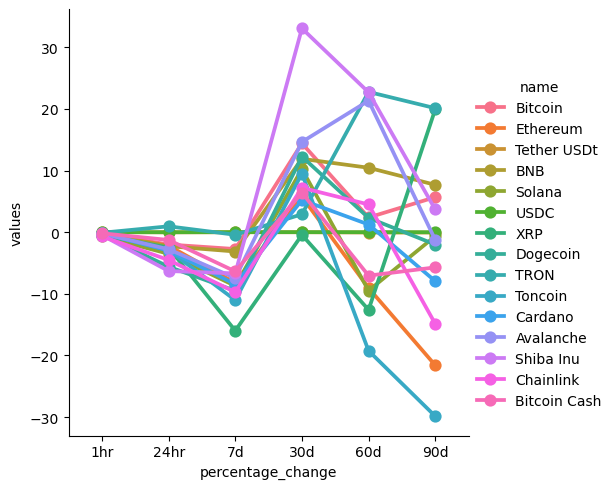

In [104]:
sns.catplot(x="percentage_change", y="values", hue="name", data=df7, kind="point")


In [110]:
df8= dfcheck[["name", "quote.USD.price", "timestamp"]]
df8= df8.query("name == 'Bitcoin'")
df8.head()

,name,quote.USD.price,timestamp
0,Bitcoin,62268.43782,2024-10-08 07:47:18.249021
15,Bitcoin,62269.32367,2024-10-08 07:48:18.889195
30,Bitcoin,62260.55860,2024-10-08 07:49:19.572136
45,Bitcoin,62260.55860,2024-10-08 07:50:20.341091
60,Bitcoin,62266.57382,2024-10-08 07:51:21.078322


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

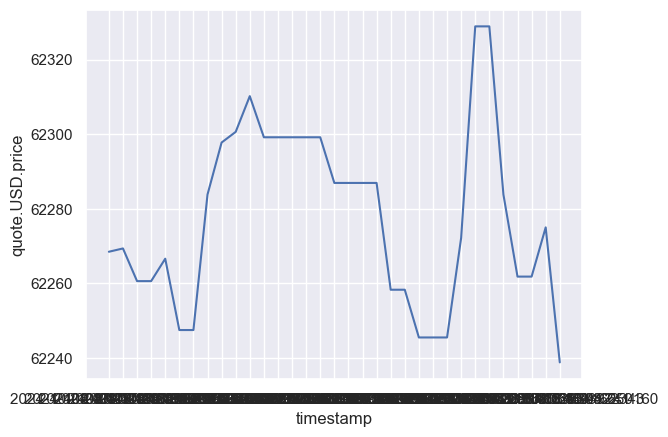

In [114]:
sns.set_theme(style="darkgrid")
sns.lineplot(x= "timestamp", y= "quote.USD.price", data=df8)